In [1]:
outlook=['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']

temperature=['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']

humidity=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']

wind=['weak','strong','weak','weak','weak','strong','strong','weak','weak','weak','strong','strong','weak','strong']

play=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [2]:
#here the input is string data ,so it is converted to numerical ,we use encoding techniques
# 1) Label encoding
# 2)One hot encoding
# 3)Get-dummies
# here we use label encoding

In [3]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
outlook_encoder=le.fit_transform(outlook)
outlook_encoder

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [4]:
temperature_encoder=le.fit_transform(temperature)
temperature_encoder

array([1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2])

In [5]:
humidity_encoder=le.fit_transform(humidity)
humidity_encoder

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0])

In [6]:
wind_encoder=le.fit_transform(wind)
wind_encoder

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [7]:
#combining inputs with zip function

In [8]:
feature=list(zip(outlook_encoder,temperature_encoder,humidity_encoder,wind_encoder))
feature

[(2, 1, 0, 1),
 (2, 1, 0, 0),
 (0, 1, 0, 1),
 (1, 2, 0, 1),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (0, 0, 1, 0),
 (2, 2, 0, 1),
 (2, 0, 1, 1),
 (1, 2, 1, 1),
 (2, 2, 1, 0),
 (0, 2, 0, 0),
 (0, 1, 1, 1),
 (1, 2, 0, 0)]

In [9]:
# Model creation
# 3 classifier in naive bayes :
# a] Gaussian :continous data(input in numeric)
# b] Multinomial :Discrete data[input in string]
# c] Bernoulli : combination of discrete and continous
# in this we use multinomial

In [14]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(feature,play)    #input in feature and output in play
y_pred=model.predict(feature)
print(model.predict([[2,0,0,0]]))   #we use encoded inputs

['no']


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
matr=confusion_matrix(y_pred,play)
print(matr)
score=accuracy_score(y_pred,play)
score

[[3 0]
 [2 9]]


0.8571428571428571

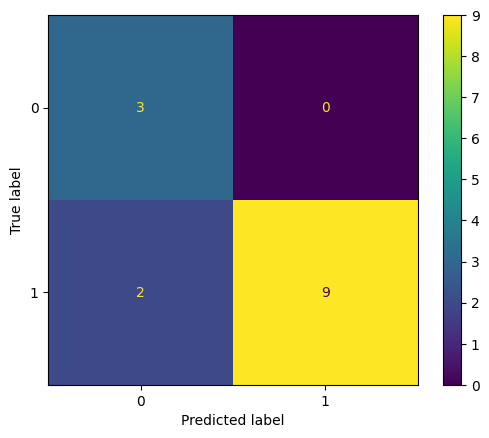

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
label=[0,1]
cmd=ConfusionMatrixDisplay(matr,display_labels=label)
cmd.plot()